## InPTA Test eccentricity data and plotting

### adding the libraries for analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the file using pandas

In [156]:
exoplanet = pd.read_csv('exoplanet.eu_catalog_1000.csv', index_col=False) #exoplanet data
exoplanet.shape
exoplanet.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.50,1.50,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.10,1.10,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.23,0.23,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,9.1,NaN,NaN,5.2150,NaN,NaN,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


## extracting eccentricity column from the data

In [157]:
e = exoplanet['eccentricity']
e.head()

0    0.231
1      NaN
2    0.080
3    0.000
4    0.369
Name: eccentricity, dtype: float64

## removing the NaN values from the list using dropna() function

In [159]:
e_non_nan = e.dropna() 
e_non_nan.head()

0    0.231
2    0.080
3    0.000
4    0.369
5    0.640
Name: eccentricity, dtype: float64

## plotting the histogram of the eccentricity data

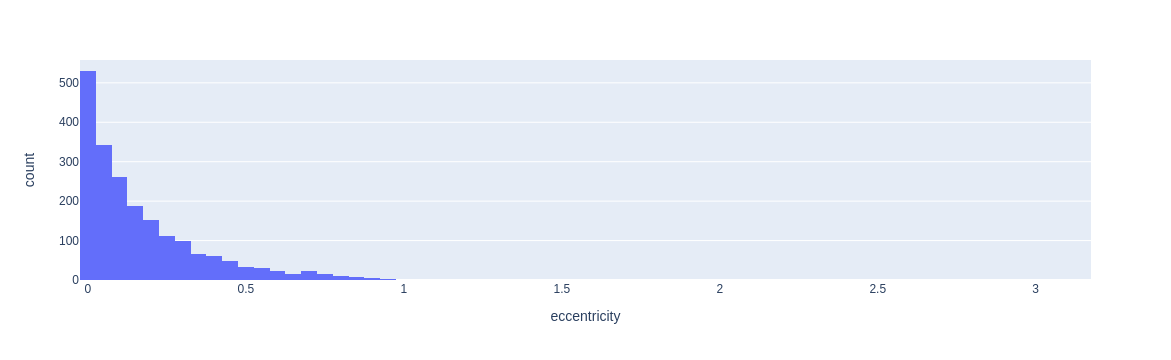

In [160]:
import plotly.express as px
fig = px.histogram(e_non_nan, nbins=100, x="eccentricity")
fig.show()

## replotting the after Gaussianization of  the distribution using Box-transformation either using scipy.stats.boxcox or from first principles

In [161]:
from scipy.stats import boxcox
e_non_nan

0       0.23100
2       0.08000
3       0.00000
4       0.36900
5       0.64000
         ...   
5023    0.01186
5024    0.24450
5025    0.31600
5026    0.00536
5027    0.32000
Name: eccentricity, Length: 2027, dtype: float64

### ecentricity values contains a 0 eccentric orbit and boxcox needs purely positive values to function. need to do something with 0

In [163]:
e = e_non_nan.values
idx = np.where(e==0)

#perturbing the 0 eccentric orbits with an epsilon quantity for boxcox to work
for i in idx:
    epsilon = 1e-20 #very small perturbation
    e[i] = epsilon

In [142]:
e_gauss = boxcox(e)[0] #gaussianized eccentricities with pertubation for the 0 eccentricity

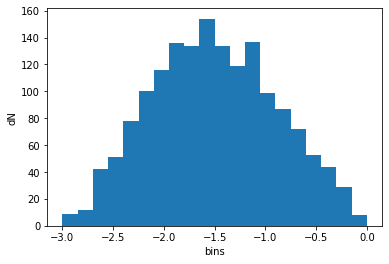

In [164]:
plt.hist(e_gauss, bins=20, range = [-3, 0])
plt.xlabel('bins')
plt.ylabel('dN')
plt.show()